In [23]:
"""
This is a skeleton code to our project
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [35]:
#features contains the list of dimensions
features = ['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness',
            'liveness', 'loudness','speechiness', 'tempo', 'valence','compression_rate']

In [36]:
Spotify = pd.read_csv('Clean_data.csv', index_col=0)
Spotify  = Spotify.drop(columns="index")

In [37]:
#Split training set and testing set at 80% to 20%
training = Spotify.sample(frac = 0.8,random_state = 1)

X_train = training[features]
y_train = training['label']
X_test = Spotify.drop(training.index)[features]
y_test = Data.drop(training.index)['label']

In [84]:
#Logistic regression
LR_Model = LogisticRegression(solver='lbfgs',multi_class='auto')

#CV score
CV_scores = cross_val_score(LR_Model, X_train, y_train, cv=10,scoring='accuracy')
print(CV_scores)
print(CV_scores.mean())

#Predict test set
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

[0.42216981 0.43160377 0.41134752 0.43026005 0.43026005 0.43230404
 0.43230404 0.43333333 0.43333333 0.43333333]
0.4290249273208306
Accuracy: 0.418957345971564


In [85]:
#Random Forest Classifier
RFC_Model = RandomForestClassifier(n_estimators=100)

#CV score
CV_scores = cross_val_score(RFC_Model, X_train, y_train, cv=10)
print(CV_scores)
print(CV_scores.mean())

#Predict test set
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

[0.46226415 0.50943396 0.47754137 0.49881797 0.48463357 0.51543943
 0.50593824 0.46904762 0.48571429 0.46904762]
0.4877878217027516
Accuracy: 0.45592417061611373


In [86]:
#KNN Classifier, 
KNN_accuracy = []
for i in range(1,20):
    KNN_Model = KNeighborsClassifier(n_neighbors=i)

    #CV score
    CV_scores = cross_val_score(KNN_Model, X_train, y_train, cv=10)
    KNN_accuracy.append(CV_scores.mean())
print(KNN_accuracy) 

#Predict test set
KNN_Model = KNeighborsClassifier(n_neighbors=7)
KNN_Model.fit(X_train, y_train)

KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

[0.3553064390399867, 0.3325319907463725, 0.3435022852619693, 0.3567439950053273, 0.3764052033612904, 0.38562231366176164, 0.40341024653651536, 0.3963185578023197, 0.40319521036959155, 0.3991419680544187, 0.4109949799219126, 0.4036388076970015, 0.4097927075041313, 0.41053118349687423, 0.4193080738208733, 0.419056461686836, 0.42165804171721444, 0.41808497235601083, 0.4171606605557331]
Accuracy: 0.4009478672985782


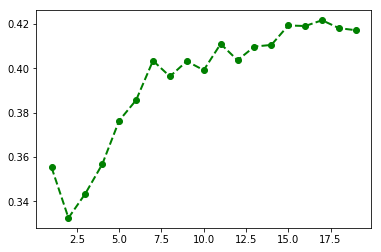

In [87]:
x=[i for i in range(1,20)]
plt.plot(x,KNN_accuracy , 'go--', linewidth=2)

In [88]:
#LDA Classifier 
#Need to define number of components
LDA_Model = LinearDiscriminantAnalysis(n_components=5)

#CV score
CV_scores = cross_val_score(LDA_Model, X_train, y_train, cv=10)
print(CV_scores)
print(CV_scores.mean())

#Predict test set
LDA_Model.fit(X_train, y_train)

LDA_Predict = LDA_Model.predict(X_test)
LDA_Accuracy = accuracy_score(y_test, LDA_Predict)
print("Accuracy: " + str(LDA_Accuracy))

[0.45283019 0.51179245 0.5035461  0.46808511 0.44680851 0.50118765
 0.4631829  0.4547619  0.51190476 0.46904762]
0.4783147189854066
Accuracy: 0.45876777251184836


In [89]:
#DecisionTree Classifier
DTC_Model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#CV score
CV_scores = cross_val_score(DTC_Model, X_train, y_train, cv=10)
print(CV_scores)
print(CV_scores.mean())

#Predict test set
DTC_Model.fit(X_train, y_train)

DTC_Predict = DTC_Model.predict(X_test)
DTC_Accuracy = accuracy_score(y_test, DTC_Predict)
print("Accuracy: " + str(DTC_Accuracy))

[0.45283019 0.49056604 0.4964539  0.48463357 0.46335697 0.48218527
 0.43230404 0.49285714 0.48333333 0.45238095]
0.4730901410594863
Accuracy: 0.42843601895734595


In [90]:
#SVM Classifier 
#to test different kernels = ['linear', 'rbf', 'sigmoid']
SVM_Model = svm.SVC(C=2,kernel='rbf',gamma='scale',decision_function_shape='ovr')

#CV score
CV_scores = cross_val_score(SVM_Model, X_train, y_train, cv=10)
print(CV_scores)
print(CV_scores.mean())

#Predict test set
SVM_Model.fit(X_train, y_train)

SVM_Predict = DTC_Model.predict(X_test)
SVM_Accuracy = accuracy_score(y_test, SVM_Predict)
print("Accuracy: " + str(SVM_Accuracy))

[0.43160377 0.42688679 0.43026005 0.43026005 0.43026005 0.43230404
 0.43230404 0.43095238 0.43333333 0.43333333]
0.43114978315102565
Accuracy: 0.42843601895734595


In [91]:
#Adaboosting Classifier
ADA_Model = AdaBoostClassifier(n_estimators=50,learning_rate=1)

#CV score
CV_scores = cross_val_score(ADA_Model, X_train, y_train, cv=10)
print(CV_scores)
print(CV_scores.mean())

#Predict test set
ADA_Model.fit(X_train, y_train)

ADA_Predict = DTC_Model.predict(X_test)
ADA_Accuracy = accuracy_score(y_test, ADA_Predict)
print("Accuracy: " + str(ADA_Accuracy))

[0.41981132 0.47877358 0.39007092 0.46099291 0.38297872 0.43230404
 0.41330166 0.42142857 0.46428571 0.41428571]
0.4278233159564456
Accuracy: 0.42843601895734595
